# A Basic Weather Model made using XGBoost

A simple weather model using XGBoost regression. 

In [761]:
import sys
!{sys.executable} -m pip install xgboost
!pip install shap


In [762]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

weather = pd.read_csv("Merged_DataSets.csv",index_col=1, encoding='latin1' )
weather.head(10)

,name,humidity,precip,windspeed,cloudcover,visibility,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c,precip_chance
datetime,,,,,,,,,,,,,,
2005-01-01,Arima,92.8,33.6296,10.3,87.1,6.4,29.0,24.1,25.4,34.6,24.1,26.2,24.1,1
2005-01-02,Arima,78.9,6.1722,13.8,64.6,7.8,32.0,23.1,26.6,34.2,23.1,27.5,22.1,1
2005-01-03,Arima,81.5,0.4826,8.1,54.8,8.4,31.8,22.1,25.5,34.0,22.1,26.4,21.8,1
2005-01-04,Arima,93.2,12.1666,11.4,83.1,6.8,29.2,23.1,24.6,33.7,23.1,25.1,23.3,1
2005-01-05,Arima,83.2,0.7874,4.7,77.9,16.8,31.3,23.7,25.1,33.4,23.7,25.3,21.8,1
2005-01-06,Arima,83.2,2.1590,10.3,92.5,9.8,30.2,24.6,26.6,34.7,24.6,27.7,23.3,1
2005-01-07,Arima,90.5,10.7950,16.1,95.0,4.4,27.1,23.1,24.9,30.4,23.1,25.7,23.2,1
2005-01-08,Arima,81.3,8.8138,10.3,90.0,10.0,29.2,24.1,26.4,32.7,24.1,28.0,22.7,1
2005-01-09,Arima,78.5,0.0000,12.8,81.6,9.5,30.1,23.7,27.3,34.2,23.7,29.5,23.1,0


In [763]:
weather.apply(pd.isnull).sum()

name                  0
humidity              0
precip                0
windspeed             0
cloudcover            0
visibility            0
tempmax c             0
tempmin c             0
avgtemp c             0
feelslikemax c        0
feelslikemin c        0
avgfeelsliketemp c    0
dewpoint c            0
precip_chance         0
dtype: int64

In [764]:
weather.dtypes

name                   object
humidity              float64
precip                float64
windspeed             float64
cloudcover            float64
visibility            float64
tempmax c             float64
tempmin c             float64
avgtemp c             float64
feelslikemax c        float64
feelslikemin c        float64
avgfeelsliketemp c    float64
dewpoint c            float64
precip_chance           int64
dtype: object

In [765]:
weather.index

Index(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04', '2005-01-05',
       '2005-01-06', '2005-01-07', '2005-01-08', '2005-01-09', '2005-01-10',
       ...
       '2025-04-18', '2025-04-19', '2025-04-20', '2025-04-21', '2025-04-22',
       '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-26', '2025-04-27'],
      dtype='object', name='datetime', length=45350)

In [766]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2025-04-18', '2025-04-19', '2025-04-20', '2025-04-21',
               '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25',
               '2025-04-26', '2025-04-27'],
              dtype='datetime64[ns]', name='datetime', length=45350, freq=None)

<Axes: xlabel='datetime'>

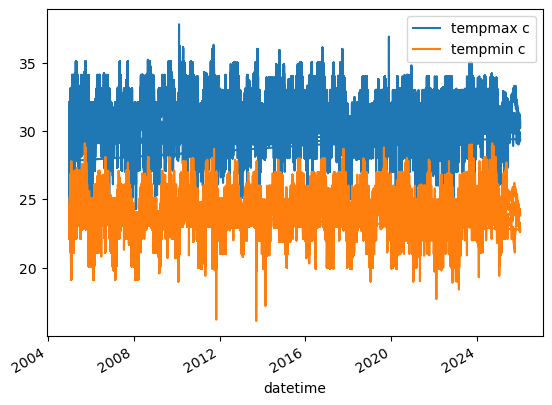

In [767]:
weather[["tempmax c", "tempmin c"]].plot()

# Train Test Split

In [769]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
weather['location_encoded'] = le.fit_transform(weather['name'])

weather.columns

Index(['name', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility',
       'tempmax c', 'tempmin c', 'avgtemp c', 'feelslikemax c',
       'feelslikemin c', 'avgfeelsliketemp c', 'dewpoint c', 'precip_chance',
       'location_encoded'],
      dtype='object')

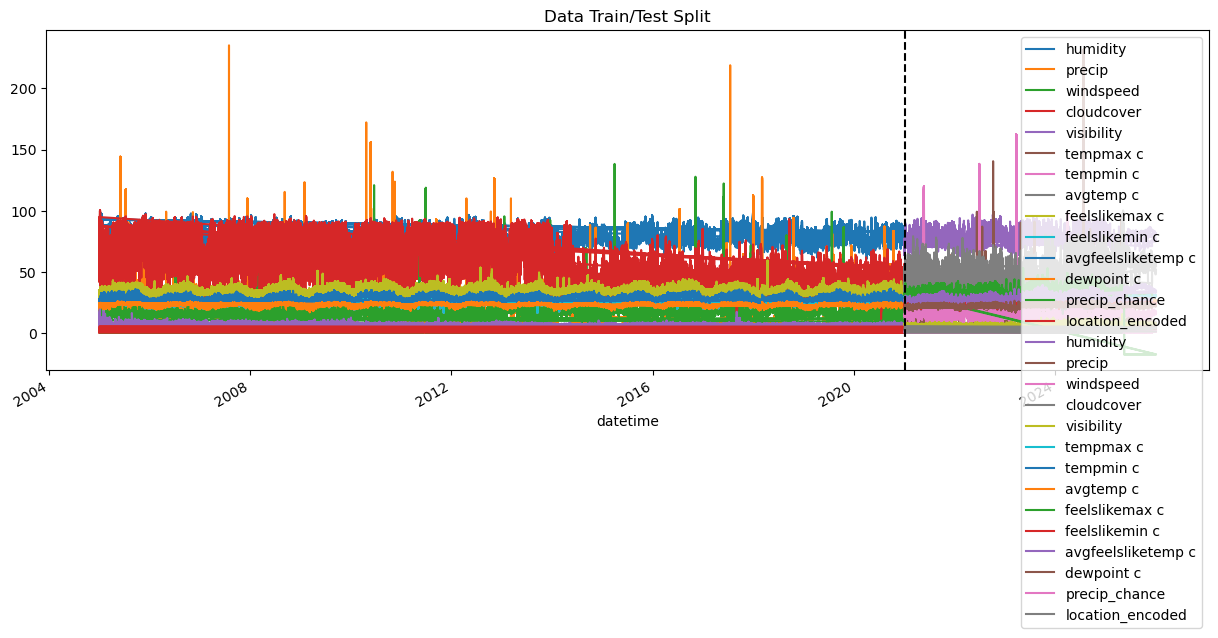

In [770]:
train = weather.loc[weather.index < '01-01-2021']
test = weather.loc[weather.index > '01-01-2021']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2021', color='black', ls='--')
plt.show()

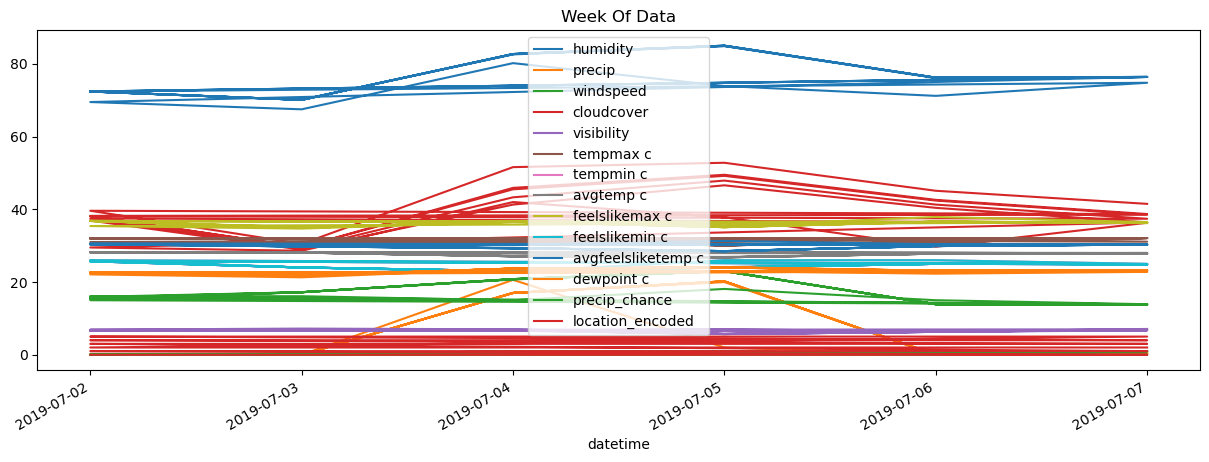

In [771]:
weather.loc[(weather.index > '07-01-2019') & (weather.index < '07-08-2019')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Create features 

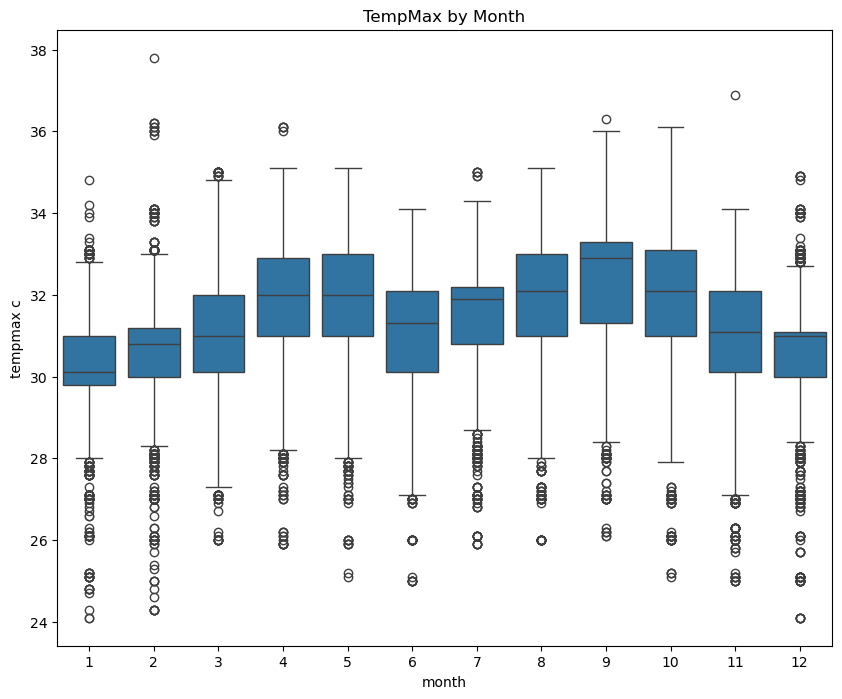

In [773]:
df = weather.copy()
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear
df['month'] = df.index.month
df['year'] = df.index.year

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='tempmax c')
ax.set_title('TempMax by Month')
plt.show()

Index(['name', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility',
       'tempmax c', 'tempmin c', 'avgtemp c', 'feelslikemax c',
       'feelslikemin c', 'avgfeelsliketemp c', 'dewpoint c', 'precip_chance',
       'location_encoded'],
      dtype='object')


<bound method Axes.set_title of <Axes: xlabel='month', ylabel='tempmin c'>>

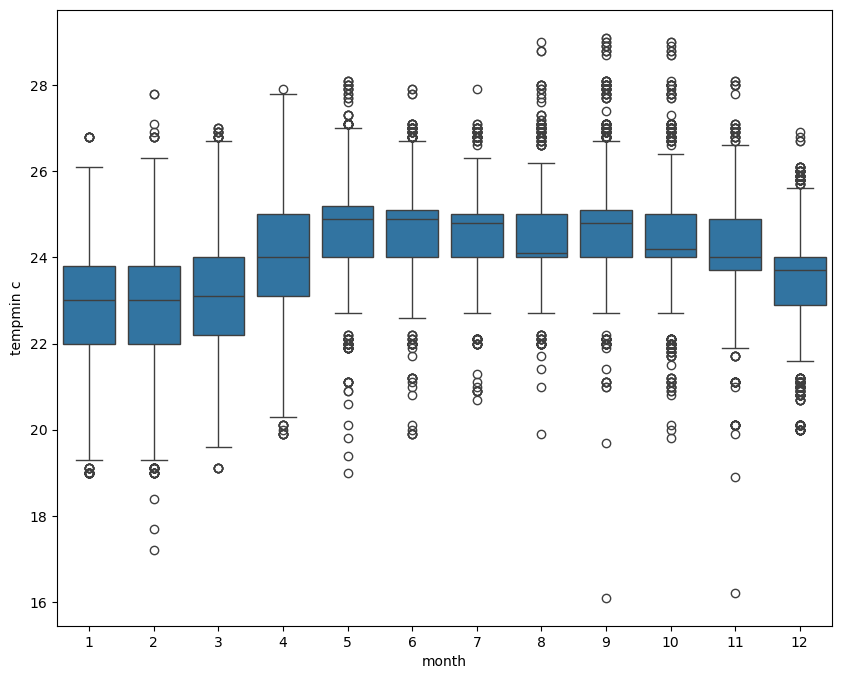

In [774]:
print(weather.columns)
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    return df
df = create_features(weather)

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='tempmin c')
ax.set_title

In [775]:
df.head(10)

,name,humidity,precip,windspeed,cloudcover,visibility,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c,precip_chance,location_encoded,dayofweek,dayofyear,month,year
datetime,,,,,,,,,,,,,,,,,,,
2005-01-01,Arima,92.8,33.6296,10.3,87.1,6.4,29.0,24.1,25.4,34.6,24.1,26.2,24.1,1,0,5,1,1,2005
2005-01-02,Arima,78.9,6.1722,13.8,64.6,7.8,32.0,23.1,26.6,34.2,23.1,27.5,22.1,1,0,6,2,1,2005
2005-01-03,Arima,81.5,0.4826,8.1,54.8,8.4,31.8,22.1,25.5,34.0,22.1,26.4,21.8,1,0,0,3,1,2005
2005-01-04,Arima,93.2,12.1666,11.4,83.1,6.8,29.2,23.1,24.6,33.7,23.1,25.1,23.3,1,0,1,4,1,2005
2005-01-05,Arima,83.2,0.7874,4.7,77.9,16.8,31.3,23.7,25.1,33.4,23.7,25.3,21.8,1,0,2,5,1,2005
2005-01-06,Arima,83.2,2.1590,10.3,92.5,9.8,30.2,24.6,26.6,34.7,24.6,27.7,23.3,1,0,3,6,1,2005
2005-01-07,Arima,90.5,10.7950,16.1,95.0,4.4,27.1,23.1,24.9,30.4,23.1,25.7,23.2,1,0,4,7,1,2005
2005-01-08,Arima,81.3,8.8138,10.3,90.0,10.0,29.2,24.1,26.4,32.7,24.1,28.0,22.7,1,0,5,8,1,2005
2005-01-09,Arima,78.5,0.0000,12.8,81.6,9.5,30.1,23.7,27.3,34.2,23.7,29.5,23.1,0,0,6,9,1,2005


# Model 


In [777]:
train = create_features(train)
test = create_features(test)

target = ['tempmax c', 'tempmin c', 'avgtemp c', 'feelslikemax c','feelslikemin c','avgfeelsliketemp c', 'dewpoint c','humidity','windspeed','cloudcover','visibility', 'precip']
features = ['location_encoded','dayofweek','dayofyear','month','year', 'tempmax c', 'tempmin c', 'avgtemp c', 'feelslikemax c','feelslikemin c','avgfeelsliketemp c', 'dewpoint c','humidity','windspeed','cloudcover','visibility', 'precip']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [778]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=5,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

y_train = train[target]

X_test = test[features]
y_test = test[target]

[0]	validation_0-rmse:35.64178	validation_1-rmse:33.88313
[100]	validation_0-rmse:13.07338	validation_1-rmse:12.67442
[200]	validation_0-rmse:4.82092	validation_1-rmse:5.38539
[300]	validation_0-rmse:1.83306	validation_1-rmse:3.36438
[400]	validation_0-rmse:0.81227	validation_1-rmse:2.99471
[500]	validation_0-rmse:0.52875	validation_1-rmse:2.94201
[600]	validation_0-rmse:0.46740	validation_1-rmse:2.93315
[654]	validation_0-rmse:0.45766	validation_1-rmse:2.93152


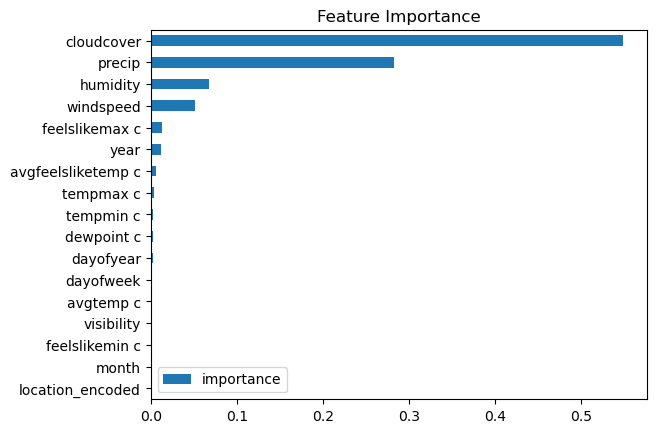

In [779]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [780]:
ptest = reg.predict(X_test)
ptest

array([[2.9957567e+01, 2.2967518e+01, 2.5663614e+01, ..., 5.2498344e+01,
        6.3921113e+00, 2.7698667e+00],
       [2.9957567e+01, 2.0972464e+01, 2.5663614e+01, ..., 3.4004696e+01,
        7.1898627e+00, 3.8169481e-02],
       [3.0756180e+01, 2.0873371e+01, 2.4965683e+01, ..., 2.9534073e+01,
        7.0901365e+00, 3.8169481e-02],
       ...,
       [3.0856062e+01, 2.4864563e+01, 2.7660555e+01, ..., 3.2304276e+01,
        6.1928334e+00, 9.0980911e-01],
       [3.1854740e+01, 2.4864563e+01, 2.7460852e+01, ..., 3.4442162e+01,
        6.1928334e+00, 6.1216974e-01],
       [2.9858076e+01, 2.3866339e+01, 2.7061298e+01, ..., 3.5353058e+01,
        6.5914907e+00, 3.0573630e-01]], dtype=float32)

In [781]:
# Evaluating the XGBoost model on the testing set

from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(mae)
print(rmse)

0.24936868752440025
2.9314533648982692


In [782]:
columns = df.columns

# Add each prediction as a new column in test
for i, col in enumerate(y_test.columns):
    test[f"{col}_prediction"] = ptest[:, i]
print(test.filter(like='_prediction').head(1))

            tempmax c_prediction  tempmin c_prediction  avgtemp c_prediction  \
datetime                                                                       
2021-01-02             29.957567             22.967518             25.663614   

            feelslikemax c_prediction  feelslikemin c_prediction  \
datetime                                                           
2021-01-02                  31.857525                  22.967758   

            avgfeelsliketemp c_prediction  dewpoint c_prediction  \
datetime                                                           
2021-01-02                      26.263323              21.070263   

            humidity_prediction  windspeed_prediction  cloudcover_prediction  \
datetime                                                                       
2021-01-02            76.688095             14.890959              52.498344   

            visibility_prediction  precip_prediction  
datetime                                             

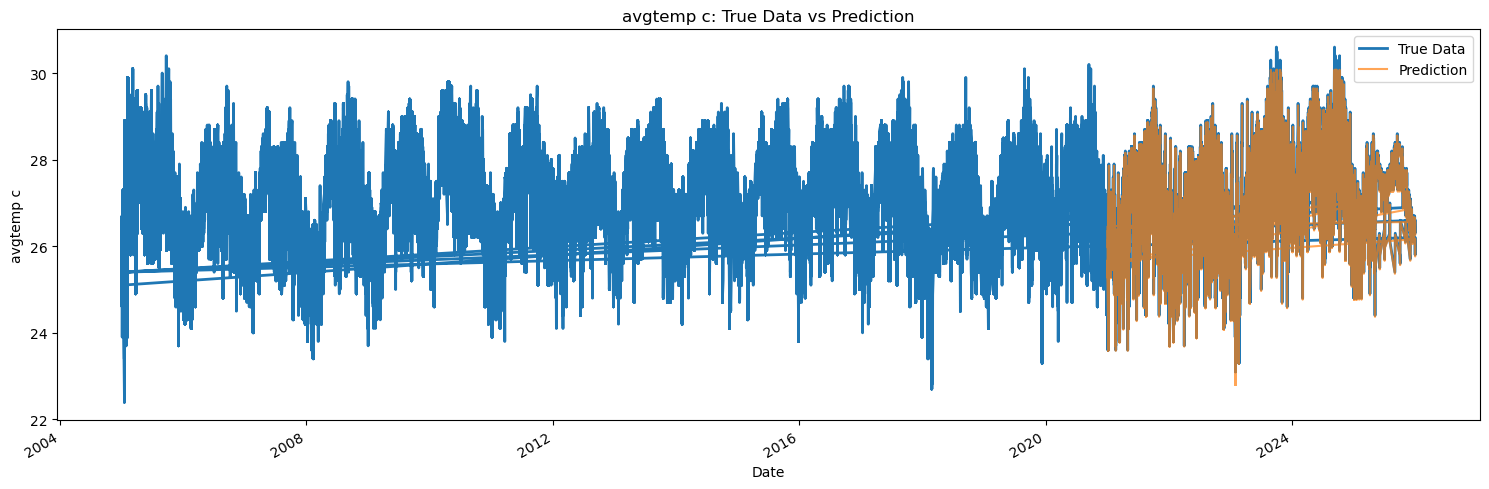

In [783]:
fig, ax = plt.subplots(figsize=(15, 5))

category = 'avgtemp c'

# Plot actual data from df
df[category].plot(ax=ax, label='True Data', linewidth=2)

# Plot predictions from test
test[f"{category}_prediction"].plot(ax=ax, label='Prediction', alpha=0.7)

ax.set_title(f"{category}: True Data vs Prediction")
ax.set_xlabel("Date")
ax.set_ylabel(category)
ax.legend()

plt.tight_layout()
plt.show()

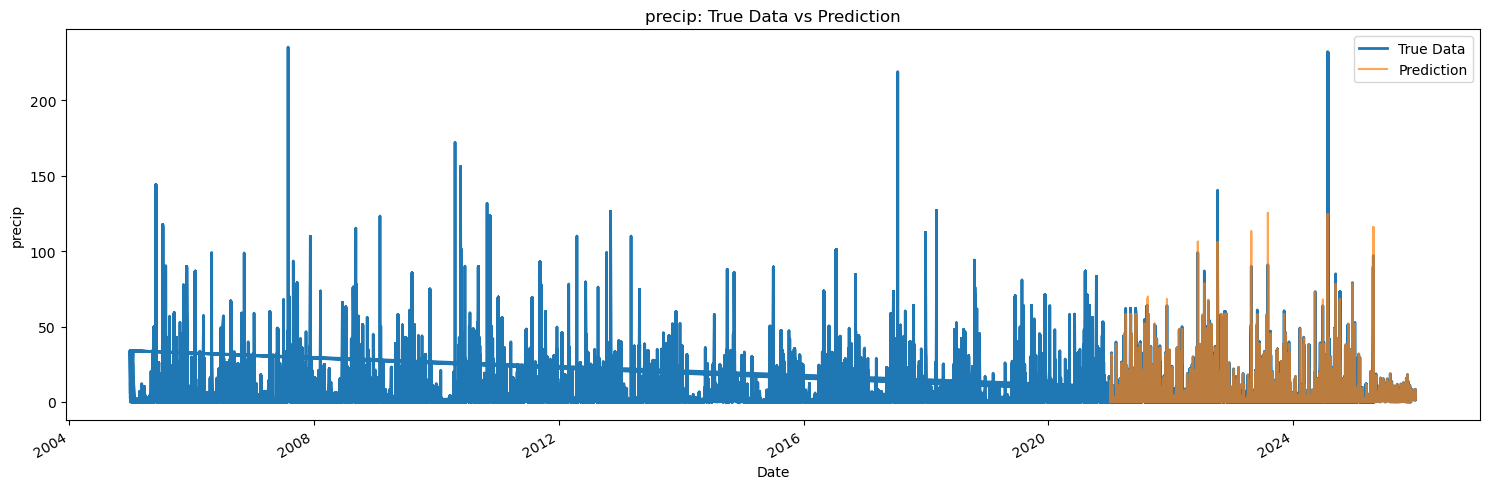

In [784]:
fig, ax = plt.subplots(figsize=(15, 5))

category = 'precip'

# Plot actual data from df
df[category].plot(ax=ax, label='True Data', linewidth=2)

# Plot predictions from test
test[f"{category}_prediction"].plot(ax=ax, label='Prediction', alpha=0.7)

ax.set_title(f"{category}: True Data vs Prediction")
ax.set_xlabel("Date")
ax.set_ylabel(category)
ax.legend()

plt.tight_layout()
plt.show()

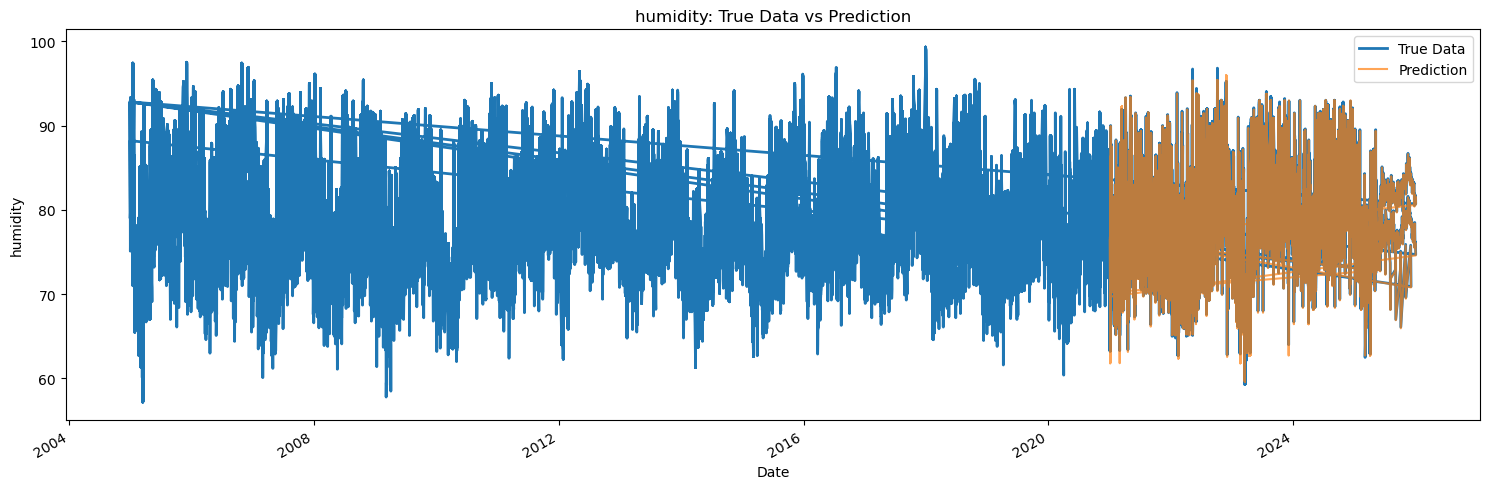

In [785]:
fig, ax = plt.subplots(figsize=(15, 5))

category = 'humidity'

# Plot actual data from df
df[category].plot(ax=ax, label='True Data', linewidth=2)

# Plot predictions from test
test[f"{category}_prediction"].plot(ax=ax, label='Prediction', alpha=0.7)

ax.set_title(f"{category}: True Data vs Prediction")
ax.set_xlabel("Date")
ax.set_ylabel(category)
ax.legend()

plt.tight_layout()
plt.show()